In [1]:
import os

while "src" not in os.listdir():
    assert "/" != os.getcwd(), "src directory not found"
    os.chdir("..")

from src.lib.resnet_loader import load_classifier_resnet50, load_contrastive_resnet50
from src.lib.depth_estimator import DepthEstimator

import torch
from torch import nn

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
classifier_estimator = DepthEstimator(load_classifier_resnet50(return_feature_map=True, device=device)).to(device)


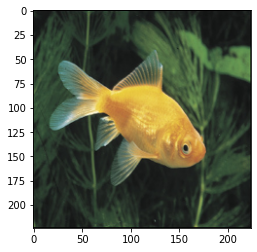

In [3]:
img = Image.open('data/imagenet-sample-images/n01443537_goldfish.JPEG')
# resize to 224x224
img = img.resize((224, 224))
img = np.array(img)
# copy image 32 times over first axis
img = np.tile(img[np.newaxis], (32, 1, 1, 1))
img = img.transpose((0, 3, 1, 2))
img = torch.from_numpy(np.array(img)).float()
# img = img.unsqueeze(0)
img = img.to(device)

plt.imshow(img.cpu().numpy()[0].transpose((1, 2, 0))/255)
plt.show()

(32, 1, 224, 224)


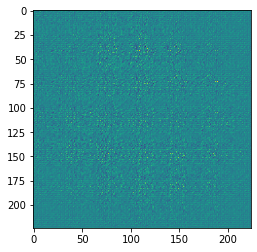

In [4]:
# pass img through classifier estimator
with torch.no_grad():
    out = classifier_estimator(img)
    out = out.cpu().numpy()
print(out.shape)
# show out
plt.imshow(out[0].transpose((1, 2, 0)))
plt.show()